<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [19]:
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import pymc3 as pm
the_file = "interaction_metric_two_canyons.csv"
df=pd.read_csv(the_file)
df['x']=df['x'] - 1

Index(['x', 'y', 'x_error', 'y_error'], dtype='object')

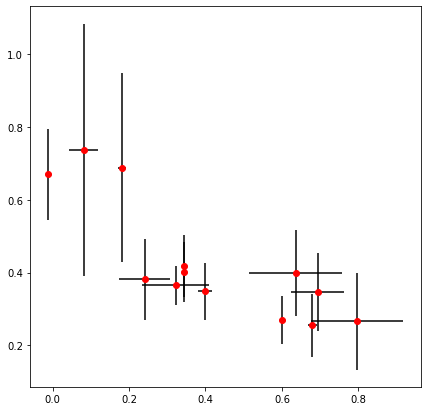

In [67]:
fig, ax = plt.subplots(figsize=(7,7))
ax.errorbar(df['x'].values, df['y'].values, fmt='ro', 
              yerr=df['y_error'].values,xerr=df['x_error'].values,ecolor='black');

In [68]:
with pm.Model() as model_robust:
    family = pm.glm.families.StudentT()
    pm.glm.GLM.from_formula('y ~ x', df, family=family)
    trace_robust = pm.sample(40000, cores=2)
   

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [lam, x, Intercept]
Sampling 2 chains: 100%|████████████████████████████████████████████████████████████████| 81000/81000 [01:58<00:00, 682.92draws/s]
The number of effective samples is smaller than 25% for some parameters.


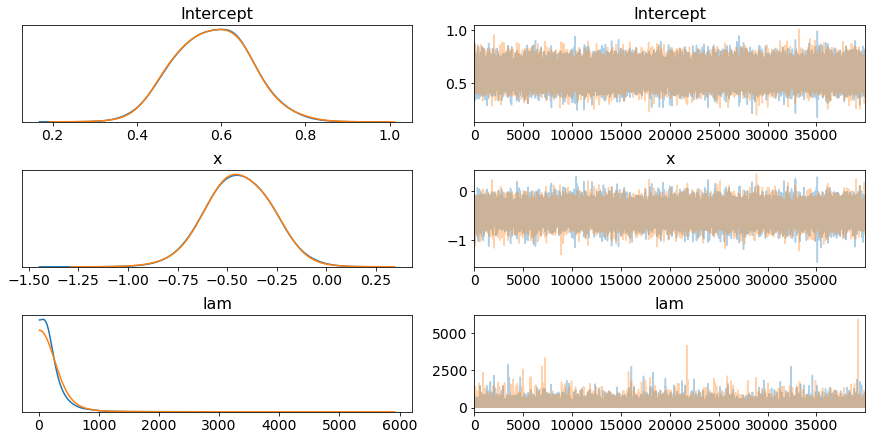

In [69]:
pm.plot_trace(trace_robust);

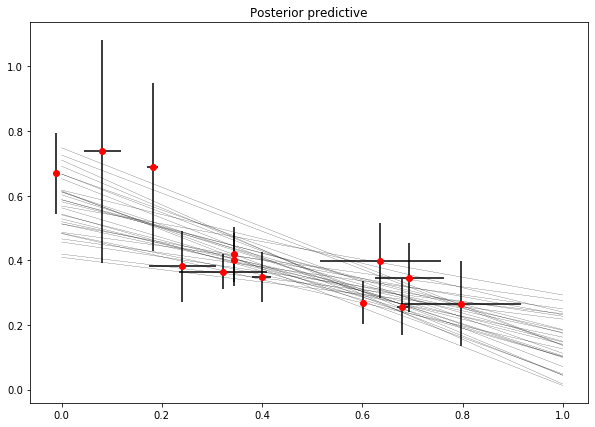

In [72]:
fig=plt.figure(figsize=(10,7))
pm.plot_posterior_predictive_glm(trace_robust,
                                 label='posterior predictive regression lines')
ax=fig.axes[0]
ax.errorbar(df['x'].values, df['y'].values, fmt='ro', 
              yerr=df['y_error'].values,xerr=df['x_error'].values,ecolor='black');